In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.integrate import odeint
import os
from matplotlib.dates import DateFormatter
from tqdm import tqdm
import time

In [2]:
f = open("output_fitted_params.csv", "w")
f.write("Relative Infectivity,Fraction Asymptomatic,Fraction of detected asymptomatics,Latent Period,Latent Period (lower 95%),Latent Period (upper 95%),Asymptomatic Infectious Period,Asymptomatic Infectious Period (lower 95%),Asymptomatic Infectious Period (upper 95%),Transmission Rate,Transmission Rate (lower 95%),Transmission Rate (upper 95%),Symptomatic Reporting Lag,Symptomatic Reporting Lag (lower 95%),Symptomatic Reporting Lag (upper 95%),Intital Exposed,Intital Exposed (lower 95%),Intital Exposed (upper 95%),Initial Infected,Initial Infected (lower 95%),Initial Infected (upper 95%),Protection Rate,Protection Rate (lower 95%),Protection Rate (upper 95%),Recovery Rate,Recovery Rate (lower 95%),Recovery Rate (upper 95%),Mortality Rate,Mortality Rate (lower 95%),Mortality Rate (upper 95%),Basic Reproductive Number,Basic Reproductive Number (lower 95%),Basic Reproductive Number (upper 95%)\n")
for i in os.listdir('India/'):
    folder = 'India/'+i
    params = np.load(folder+"/parameters.npy")
    latents = np.loadtxt('latent.csv',delimiter=',')
    infects = np.loadtxt('infect.csv',delimiter=',')
    f.write("{},{},{},{},{},{},{},{},{}".format(i.split('_')[2],i.split('_')[5],i.split('_')[8],np.mean(latents),np.quantile(latents,0.025),np.quantile(latents,0.975),np.mean(infects),np.quantile(infects,0.025),np.quantile(infects,0.975)))
    for j in range(params.shape[1]):
        if j >= 5:
            f.write(",{:0.4f},{:0.4f},{:0.4f}".format(np.mean(params[:,j]),np.quantile(params[:,j],0.025),np.quantile(params[:,j],0.975)))
        elif j >= 2 and j<4:
            f.write(",{:0.0f},{:0.0f},{:0.0f}".format(np.mean(10**params[:,j]),np.quantile(10**params[:,j],0.025),np.quantile(10**params[:,j],0.975)))
        elif j == 1:
            f.write(",{:0.3f},{:0.3f},{:0.3f}".format(np.mean(1/params[:,j]),np.quantile(1/params[:,j],0.025),np.quantile(1/params[:,j],0.975)))   
        else:
            f.write(",{:0.3f},{:0.3f},{:0.3f}".format(np.mean(params[:,j]),np.quantile(params[:,j],0.025),np.quantile(params[:,j],0.975)))   
    d_a = np.mean(1/np.loadtxt('infect.csv',delimiter=','))
    a_test = float(i.split('_')[8])/(1-float(i.split('_')[8]))
    r = float(i.split('_')[5])/(1-float(i.split('_')[5]))
    a_i = float(i.split('_')[2])
    r0 = (d_a*params[:,0]*(a_test+1)+params[:,1]*a_i*params[:,0]*r)/(d_a*params[:,1]*(r+1)*(a_test+1))
    f.write(",{:0.3f},{:0.3f},{:0.3f}".format(np.mean(r0),np.quantile(r0,0.025),np.quantile(r0,0.975)))
    f.write("\n")
f.close()

In [58]:
df = pd.read_csv('output_fitted_params.csv')
df.head()

,Relative Infectivity,Fraction Asymptomatic,Fraction of detected asymptomatics,Latent Period,Latent Period (lower 95%),Latent Period (upper 95%),Asymptomatic Infectious Period,Asymptomatic Infectious Period (lower 95%),Asymptomatic Infectious Period (upper 95%),Transmission Rate,...,Protection Rate (upper 95%),Recovery Rate,Recovery Rate (lower 95%),Recovery Rate (upper 95%),Mortality Rate,Mortality Rate (lower 95%),Mortality Rate (upper 95%),Basic Reproductive Number,Basic Reproductive Number (lower 95%),Basic Reproductive Number (upper 95%)
0,0.25,0.0,0.05,3.494964,2.820867,4.334704,4.306757,3.176034,5.352785,1.550,...,0.047,0.0191,0.0184,0.0198,0.0042,0.0039,0.0046,3.456,2.993,4.041
1,0.25,0.0,0.10,3.494964,2.820867,4.334704,4.306757,3.176034,5.352785,1.552,...,0.046,0.0191,0.0184,0.0199,0.0042,0.0039,0.0046,3.462,2.981,4.038
2,0.25,0.0,0.20,3.494964,2.820867,4.334704,4.306757,3.176034,5.352785,1.552,...,0.047,0.0191,0.0184,0.0198,0.0042,0.0039,0.0046,3.466,3.010,4.072
3,0.25,0.2,0.05,3.494964,2.820867,4.334704,4.306757,3.176034,5.352785,1.598,...,0.043,0.0193,0.0185,0.0200,0.0043,0.0039,0.0046,3.179,2.780,3.626
4,0.25,0.2,0.10,3.494964,2.820867,4.334704,4.306757,3.176034,5.352785,1.600,...,0.043,0.0195,0.0188,0.0202,0.0043,0.0040,0.0047,3.174,2.774,3.680


In [59]:
df.columns

Index(['Relative Infectivity', 'Fraction Asymptomatic',
       'Fraction of detected asymptomatics', 'Latent Period',
       'Latent Period (lower 95%)', 'Latent Period (upper 95%)',
       'Asymptomatic Infectious Period',
       'Asymptomatic Infectious Period (lower 95%)',
       'Asymptomatic Infectious Period (upper 95%)', 'Transmission Rate',
       'Transmission Rate (lower 95%)', 'Transmission Rate (upper 95%)',
       'Symptomatic Reporting Lag', 'Symptomatic Reporting Lag (lower 95%)',
       'Symptomatic Reporting Lag (upper 95%)', 'Intital Exposed',
       'Intital Exposed (lower 95%)', 'Intital Exposed (upper 95%)',
       'Initial Infected', 'Initial Infected (lower 95%)',
       'Initial Infected (upper 95%)', 'Protection Rate',
       'Protection Rate (lower 95%)', 'Protection Rate (upper 95%)',
       'Recovery Rate', 'Recovery Rate (lower 95%)',
       'Recovery Rate (upper 95%)', 'Mortality Rate',
       'Mortality Rate (lower 95%)', 'Mortality Rate (upper 95%)',
   

# Sensitivity Analysis

## Suppemental Figure 5

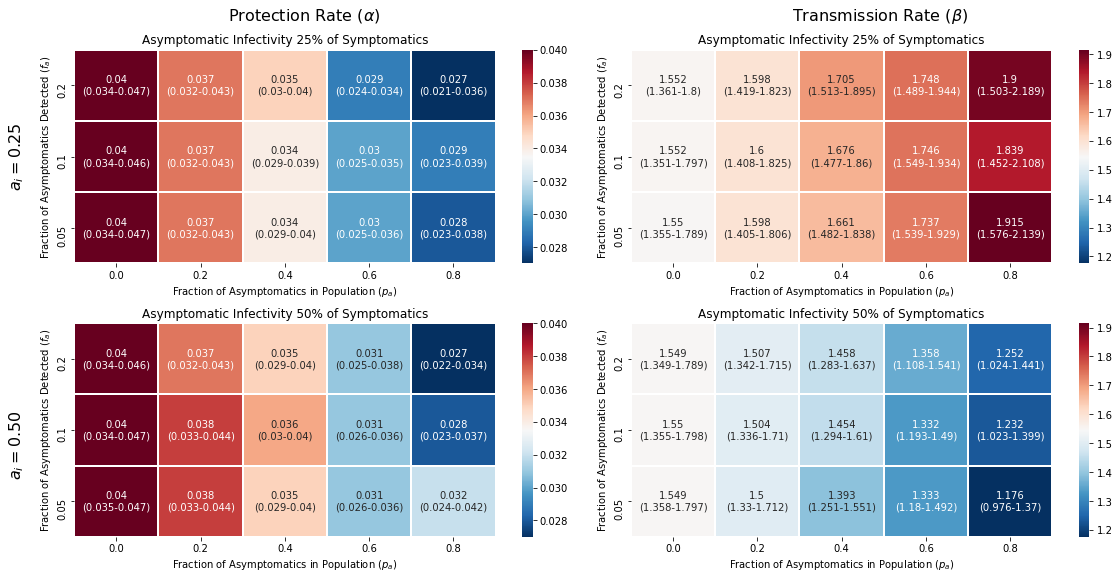

In [4]:
df = pd.read_csv('output_fitted_params.csv')
from numpy.core import defchararray as ch

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
vmax = np.max(df['Protection Rate'])
vmin = np.min(df['Protection Rate'])

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Protection Rate').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Protection Rate (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Protection Rate (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Protection Rate'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax1,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Protection Rate').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Protection Rate (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Protection Rate (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Protection Rate'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax2,vmax=vmax,vmin=vmin)

ax1.set_ylim(0,3)
ax1.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax1.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax1.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax2.set_ylim(0,3)
ax2.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax2.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax2.set_title('Asymptomatic Infectivity 50% of Symptomatics')

ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)
vmax = np.max(df['Transmission Rate'])
vmin = np.min(df['Transmission Rate'])

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Transmission Rate').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Transmission Rate (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Transmission Rate (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Transmission Rate'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax3,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Transmission Rate').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Transmission Rate (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Transmission Rate (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Transmission Rate'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax4,vmax=vmax,vmin=vmin)

ax3.set_ylim(0,3)
ax3.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax3.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax3.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax4.set_ylim(0,3)
ax4.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax4.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax4.set_title('Asymptomatic Infectivity 50% of Symptomatics')

plt.figtext(0.25,1.0, r"Protection Rate ($\alpha$)", ha="center", va="top", fontsize=16, color="k")
plt.figtext(0.75,1.0, r"Transmission Rate ($\beta$)", ha="center", va="top", fontsize=16, color="k")

plt.figtext(0.0,0.30, r"$a_i=0.50$", ha="center", va="top", fontsize=16, color="k",rotation=90)
plt.figtext(0.0,0.80, r"$a_i=0.25$", ha="center", va="top", fontsize=16, color="k",rotation=90)

plt.tight_layout()
plt.subplots_adjust(top = 0.925,left=0.05)
plt.savefig('Figures/SuppFig5.png',dpi =600, bbox_inches='tight')

## Suppemental Figure 6

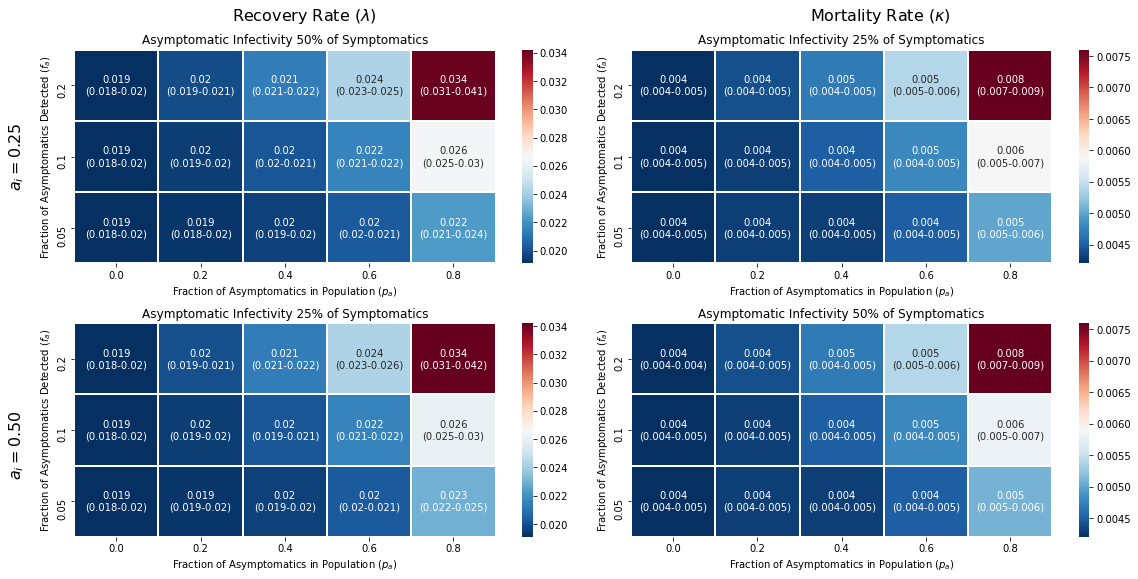

In [5]:
df = pd.read_csv('output_fitted_params.csv')
from numpy.core import defchararray as ch

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
vmax = np.max(df['Recovery Rate'])
vmin = np.min(df['Recovery Rate'])

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Recovery Rate').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Recovery Rate (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Recovery Rate (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.250].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Recovery Rate'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax1,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Recovery Rate').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Recovery Rate (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Recovery Rate (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Recovery Rate'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax2,vmax=vmax,vmin=vmin)

ax1.set_ylim(0,3)
ax1.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax1.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax1.set_title('Asymptomatic Infectivity 50% of Symptomatics')
ax2.set_ylim(0,3)
ax2.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax2.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax2.set_title('Asymptomatic Infectivity 25% of Symptomatics')

ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)
vmax = np.max(df['Mortality Rate'])
vmin = np.min(df['Mortality Rate'])

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Mortality Rate').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Mortality Rate (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Mortality Rate (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Mortality Rate'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax3,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Mortality Rate').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Mortality Rate (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Mortality Rate (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Mortality Rate'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax4,vmax=vmax,vmin=vmin)

ax3.set_ylim(0,3)
ax3.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax3.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax3.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax4.set_ylim(0,3)
ax4.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax4.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax4.set_title('Asymptomatic Infectivity 50% of Symptomatics')

plt.figtext(0.25,1.0, r"Recovery Rate ($\lambda$)", ha="center", va="top", fontsize=16, color="k")
plt.figtext(0.75,1.0, r"Mortality Rate ($\kappa$)", ha="center", va="top", fontsize=16, color="k")

plt.figtext(0.0,0.30, r"$a_i=0.50$", ha="center", va="top", fontsize=16, color="k",rotation=90)
plt.figtext(0.0,0.80, r"$a_i=0.25$", ha="center", va="top", fontsize=16, color="k",rotation=90)

plt.tight_layout()
plt.subplots_adjust(top = 0.925,left=0.05)
plt.savefig('Figures/SuppFig6.png',dpi =600, bbox_inches='tight')

## Suppemental Figure 7

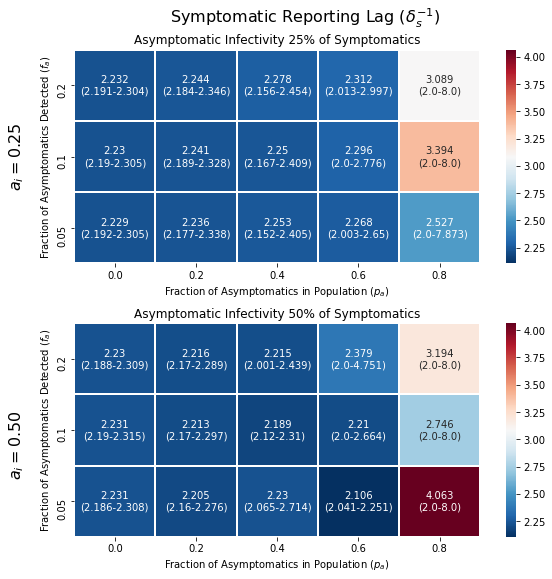

In [6]:
df = pd.read_csv('output_fitted_params.csv')
from numpy.core import defchararray as ch

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
vmax = np.max(df['Symptomatic Reporting Lag'])
vmin = np.min(df['Symptomatic Reporting Lag'])

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Symptomatic Reporting Lag').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Symptomatic Reporting Lag (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Symptomatic Reporting Lag (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Symptomatic Reporting Lag'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax1,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Symptomatic Reporting Lag').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Symptomatic Reporting Lag (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Symptomatic Reporting Lag (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Symptomatic Reporting Lag'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax2,vmax=vmax,vmin=vmin)

ax1.set_ylim(0,3)
ax1.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax1.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax1.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax2.set_ylim(0,3)
ax2.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax2.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax2.set_title('Asymptomatic Infectivity 50% of Symptomatics')


plt.figtext(0.5,1.0, r"Symptomatic Reporting Lag ($\delta_s^{-1}$)", ha="center", va="top", fontsize=16, color="k")

plt.figtext(0.0,0.30, r"$a_i=0.50$", ha="center", va="top", fontsize=16, color="k",rotation=90)
plt.figtext(0.0,0.80, r"$a_i=0.25$", ha="center", va="top", fontsize=16, color="k",rotation=90)

plt.tight_layout()
plt.subplots_adjust(top = 0.925,left=0.1)
plt.savefig('Figures/SuppFig7.png',dpi =600, bbox_inches='tight')

## Suppemental Figure 9

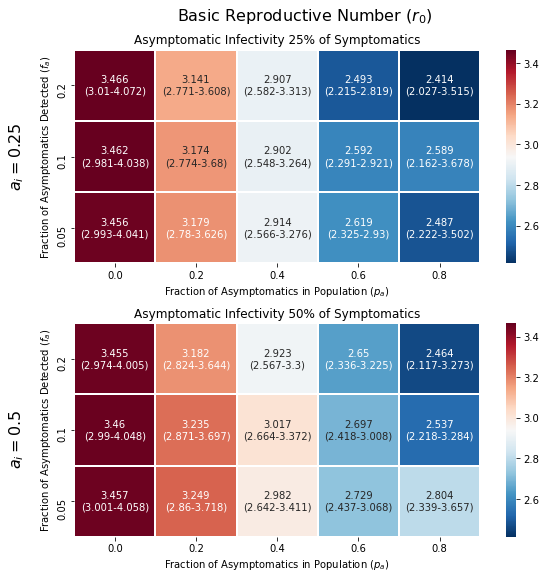

In [7]:
df = pd.read_csv('output_fitted_params.csv')
from numpy.core import defchararray as ch

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
vmax = np.max(df['Basic Reproductive Number'])
vmin = np.min(df['Basic Reproductive Number'])

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Basic Reproductive Number').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Basic Reproductive Number (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Basic Reproductive Number (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Basic Reproductive Number'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax1,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Basic Reproductive Number').values),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Basic Reproductive Number (lower 95%)').values),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Basic Reproductive Number (upper 95%)').values),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.5].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Basic Reproductive Number'),
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax2,vmax=vmax,vmin=vmin)

ax1.set_ylim(0,3)
ax1.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax1.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax1.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax2.set_ylim(0,3)
ax2.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax2.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax2.set_title('Asymptomatic Infectivity 50% of Symptomatics')


plt.figtext(0.50,1.0, r"Basic Reproductive Number ($r_0$)", ha="center", va="top", fontsize=16, color="k")

plt.figtext(0.0,0.30, r"$a_i=0.5$", ha="center", va="top", fontsize=16, color="k",rotation=90)
plt.figtext(0.0,0.80, r"$a_i=0.25$", ha="center", va="top", fontsize=16, color="k",rotation=90)

plt.tight_layout()
plt.subplots_adjust(top = 0.925,left=0.1)
plt.savefig('Figures/SuppFig9.png',dpi =600, bbox_inches='tight')

## Generate Long Term Predictions

In [47]:
def model(time,*p,changeATE=None,changeS=None,changeDA=None,lag=None):

    E0 = 10**p[2]
    IS0 = 10**p[3]
    A0 = r*IS0
    QS0 = df.active[0]
    RS0 = df.recovered[0]
    D0 = df.dead[0]
    RU0 = r*df.recovered[0]
    RA0 = 0
    P0 = 0
    QA0 = 0
    b = p[0]
    d = p[1]
    ss = 0
    aa = p[4]
    l = p[5]
    k = p[6]

    def dX(X,t):
        a_t=a_test
        a = aa
        s = ss
        d_a_ = d_a
        M = np.array([[ -a,       0,     0,              0,     0,     0,     0,     0,     s,     0,     0],
                      [  0,-(1+r)*g,     0,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       g,    -d,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,     r*g,     0, -d_a_-d_a_*a_t,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     d,              0,  -l-k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     l,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,           d_a_,     0,     0,     0,     0,     0,     0,     0],
                      [  a,       0,     0,              0,     0,     0,     0,     0,    -s,     0,     0],
                      [  0,       0,     0,       d_a_*a_t,     0,     0,     0,     0,     0,    -l,     0],
                      [  0,       0,     0,              0,     0,     0,     0,     0,     0,     l,     0]])
        C = X[0]*X[2]*np.array([[  -b/N],
                                [   b/N],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0]])
        C = C + X[0]*X[3]*np.array([[-a_i*b/N],
                                    [ a_i*b/N],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0]])
        return (np.matmul(M,X.reshape(1,-1).T)+C).flatten()

    return odeint(dX,[N-E0-IS0-QS0-RS0-D0-RU0-P0-QA0-RA0,E0,IS0,A0,QS0,RS0,D0,RU0,P0,QA0,RA0],time)

In [55]:
gs = np.loadtxt('latent.csv',delimiter=',')
d_as = np.loadtxt('infect.csv',delimiter=',')

f = open("output_fitted_prediction.csv", "w")
f.write("Relative Infectivity,Fraction Asymptomatic,Fraction of detected asymptomatics,Number of Bootstraps,Total Detected Recovered,Total Detected Recovered (lower 95%),Total Detected Recovered (upper 95%),Total Symptomatic Recovered,Total Symptomatic Recovered (lower 95%),Total Symptomatic Recovered (upper 95%),Peak Quarantined,Peak Quarantined (lower 95%),Peak Quarantined (upper 95%),Peak Symptomatic Quarantined,Peak Symptomatic Quarantined (lower 95%),Peak Symptomatic Quarantined (upper 95%),Total Dead,Total Dead (lower 95%),Total Dead (upper 95%),Total Detected,Total Detected (lower 95%),Total Detected (upper 95%),Total Infected,Total Infected (lower 95%),Total Infected (upper 95%),Total Symptomatic Detected,Total Symptomatic Detected (lower 95%),Total Symptomatic Detected (upper 95%),Days to Peak,Days to Peak (lower 95%),Days to Peak (upper 95%),Days to Inflection,Days to Inflection (lower 95%),Days to Inflection (upper 95%),Days to Recovery Overtake,Days to Recovery Overtake (lower 95%),Days to Recovery Overtake (upper 95%)\n")
for n,i in enumerate(os.listdir('India/')):
    print(f"Calculating: {n+1} of {len(os.listdir('India/'))}")
    folder = 'India/'+i
    a_i = float(folder.split('_')[2])
    p_a = float(folder.split('_')[5])
    f_a = float(folder.split('_')[8])

    params = np.load(folder+"/parameters.npy")
    df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
    df.columns = ['active','recovered','dead']
    N = 1324171354

    RD_max = []
    RS_max = []
    Q_max = []
    QS_max = []
    D_max = []
    nDet_max = []
    nTotal_max = []
    nSymp_max = []
    peak_date = []
    inflection_date = []
    recovery_date = []
    time.sleep(1)
    for bootstrp_no in tqdm(range(params.shape[0])):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model(np.arange(0,df.shape[0]+365,0.1),*popt)[::10,:]
        RD_max.append(np.max(prediction[:,5]+prediction[:,10]))
        RS_max.append(np.max(prediction[:,5]))
        Q_max.append(np.max(prediction[:,4]+prediction[:,9]))
        QS_max.append(np.max(prediction[:,4]))
        D_max.append(np.max(prediction[:,6]))        
        nDet_max.append(np.max(prediction[:,5]+prediction[:,6]+prediction[:,4]+prediction[:,9]+prediction[:,10]))
        nTotal_max.append(np.max(N-prediction[:,0]-prediction[:,8]))
        nSymp_max.append(np.max(prediction[:,5]+prediction[:,6]+prediction[:,4]))
        peak_date.append(np.argmax(prediction[:,4]+prediction[:,9]))
        inflection_date.append(np.argmax(np.diff(prediction[:,4]+prediction[:,9]+prediction[:,5]+prediction[:,6]+prediction[:,10])))
        recovery_date.append(np.argmax(prediction[:,5]+prediction[:,10]>prediction[:,4]+prediction[:,9]))
        
    f.write("{},{},{},{:0.0f},".format(i.split('_')[2],i.split('_')[5],i.split('_')[8],params.shape[0]))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(RD_max),np.quantile(RD_max,0.025),np.quantile(RD_max,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(RS_max),np.quantile(RS_max,0.025),np.quantile(RS_max,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(Q_max),np.quantile(Q_max,0.025),np.quantile(Q_max,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(QS_max),np.quantile(QS_max,0.025),np.quantile(QS_max,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(D_max),np.quantile(D_max,0.025),np.quantile(D_max,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(nDet_max),np.quantile(nDet_max,0.025),np.quantile(nDet_max,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(nTotal_max),np.quantile(nTotal_max,0.025),np.quantile(nTotal_max,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(nSymp_max),np.quantile(nSymp_max,0.025),np.quantile(nSymp_max,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(peak_date),np.quantile(peak_date,0.025),np.quantile(peak_date,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(inflection_date),np.quantile(inflection_date,0.025),np.quantile(inflection_date,0.975)))
    f.write("{:0.0f},{:0.0f},{:0.0f}".format(np.mean(recovery_date),np.quantile(recovery_date,0.025),np.quantile(recovery_date,0.975)))
    f.write("\n")
f.close()

Calculating: 1 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.60it/s]


Calculating: 2 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.47it/s]


Calculating: 3 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.17it/s]


Calculating: 4 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.68it/s]


Calculating: 5 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.62it/s]


Calculating: 6 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 16.06it/s]


Calculating: 7 of 30


100%|████████████████████████████████████████████████████████████████████████████████| 996/996 [01:06<00:00, 14.97it/s]


Calculating: 8 of 30


100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [01:05<00:00, 15.16it/s]


Calculating: 9 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.88it/s]


Calculating: 10 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:21<00:00, 12.29it/s]


Calculating: 11 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:18<00:00, 12.69it/s]


Calculating: 12 of 30


100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [01:15<00:00, 13.17it/s]


Calculating: 13 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:58<00:00,  8.45it/s]


Calculating: 14 of 30


100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [01:55<00:00,  8.67it/s]


Calculating: 15 of 30


100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [01:56<00:00,  8.59it/s]


Calculating: 16 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:03<00:00, 15.66it/s]


Calculating: 17 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:09<00:00, 14.35it/s]


Calculating: 18 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.16it/s]


Calculating: 19 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.62it/s]


Calculating: 20 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.29it/s]


Calculating: 21 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 15.14it/s]


Calculating: 22 of 30


100%|████████████████████████████████████████████████████████████████████████████████| 998/998 [01:12<00:00, 13.71it/s]


Calculating: 23 of 30


100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [01:13<00:00, 13.65it/s]


Calculating: 24 of 30


100%|████████████████████████████████████████████████████████████████████████████████| 998/998 [01:17<00:00, 12.89it/s]


Calculating: 25 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:26<00:00, 11.57it/s]


Calculating: 26 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.14it/s]


Calculating: 27 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.35it/s]


Calculating: 28 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:57<00:00,  8.53it/s]


Calculating: 29 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:56<00:00,  8.56it/s]


Calculating: 30 of 30


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.87it/s]


In [64]:
df = pd.read_csv('output_fitted_prediction.csv')
df.head()

,Relative Infectivity,Fraction Asymptomatic,Fraction of detected asymptomatics,Number of Bootstraps,Total Detected Recovered,Total Detected Recovered (lower 95%),Total Detected Recovered (upper 95%),Total Symptomatic Recovered,Total Symptomatic Recovered (lower 95%),Total Symptomatic Recovered (upper 95%),...,Total Symptomatic Detected (upper 95%),Days to Peak,Days to Peak (lower 95%),Days to Peak (upper 95%),Days to Infection,Days to Infection (lower 95%),Days to Infection (upper 95%),Days to Recovery Overtake,Days to Recovery Overtake (lower 95%),Days to Recovery Overtake (upper 95%)
0,0.25,0.0,0.05,1000,26035,23310,29244,26035,23310,29244,...,35777,49,47,51,32,30,33,70,68,72
1,0.25,0.0,0.10,1000,26054,23274,29618,26054,23274,29618,...,36043,49,47,51,32,30,34,70,68,72
2,0.25,0.0,0.20,1000,26004,23323,29459,26004,23323,29459,...,36129,49,47,51,32,30,34,70,68,72
3,0.25,0.2,0.05,1000,25635,23198,28620,25252,22853,28188,...,34360,48,47,51,32,30,33,69,68,71
4,0.25,0.2,0.10,1000,25670,23171,28718,24913,22485,27873,...,33942,48,47,51,32,30,33,69,67,71


In [65]:
df.columns

Index(['Relative Infectivity', 'Fraction Asymptomatic',
       'Fraction of detected asymptomatics', 'Number of Bootstraps',
       'Total Detected Recovered', 'Total Detected Recovered (lower 95%)',
       'Total Detected Recovered (upper 95%)', 'Total Symptomatic Recovered',
       'Total Symptomatic Recovered (lower 95%)',
       'Total Symptomatic Recovered (upper 95%)', 'Peak Quarantined',
       'Peak Quarantined (lower 95%)', 'Peak Quarantined (upper 95%)',
       'Peak Symptomatic Quarantined',
       'Peak Symptomatic Quarantined (lower 95%)',
       'Peak Symptomatic Quarantined (upper 95%)', 'Total Dead',
       'Total Dead (lower 95%)', 'Total Dead (upper 95%)', 'Total Detected',
       'Total Detected (lower 95%)', 'Total Detected (upper 95%)',
       'Total Infected', 'Total Infected (lower 95%)',
       'Total Infected (upper 95%)', 'Total Symptomatic Detected',
       'Total Symptomatic Detected (lower 95%)',
       'Total Symptomatic Detected (upper 95%)', 'Days to Pea

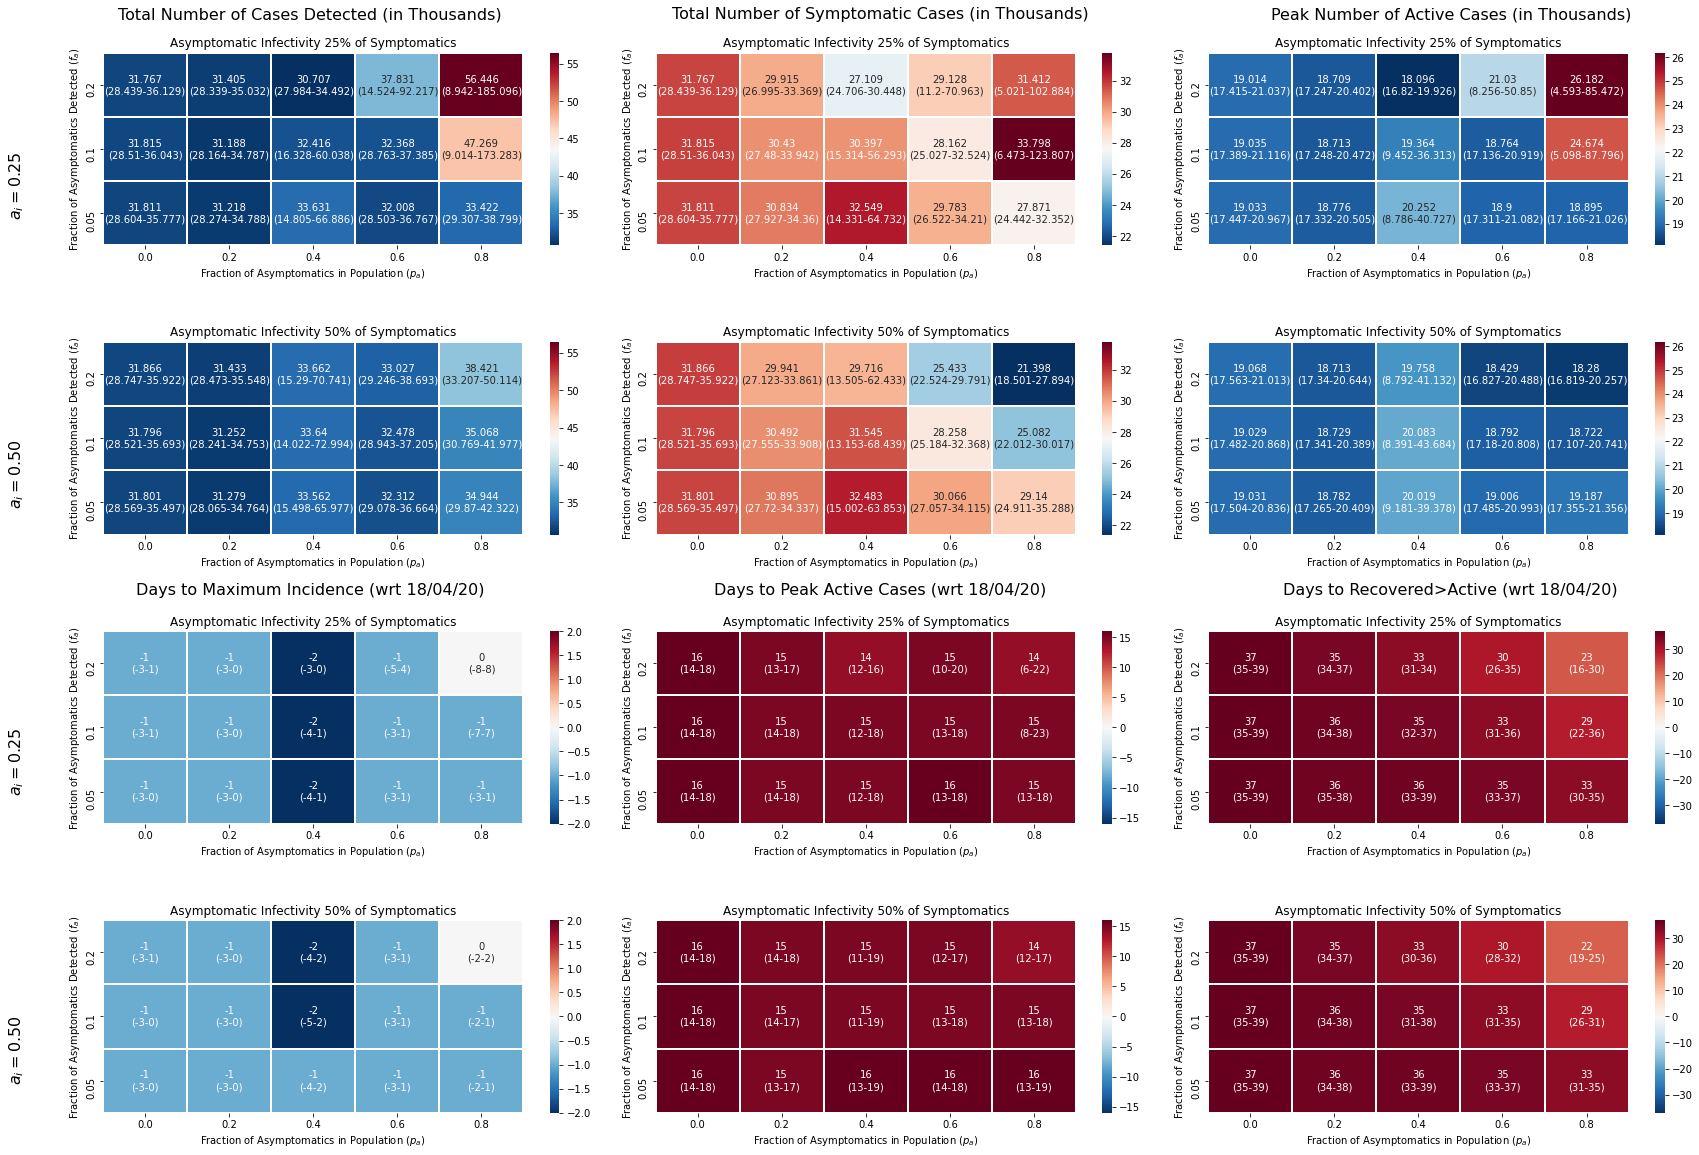

In [8]:
df = pd.read_csv('output_fitted_prediction.csv')
from numpy.core import defchararray as ch

fig = plt.figure(figsize=(24,16))
ax1 = fig.add_subplot(431)
ax2 = fig.add_subplot(434)
vmax = np.max(df['Total Detected'])/1000
vmin = np.min(df['Total Detected'])/1000

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Detected').values/1000),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Detected (lower 95%)').values/1000),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Detected (upper 95%)').values/1000),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Detected')/1000,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax1,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Detected').values/1000),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Detected (lower 95%)').values/1000),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Detected (upper 95%)').values/1000),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Detected')/1000,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax2,vmax=vmax,vmin=vmin)

ax1.set_ylim(0,3)
ax1.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax1.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax1.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax2.set_ylim(0,3)
ax2.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax2.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax2.set_title('Asymptomatic Infectivity 50% of Symptomatics')

ax3 = fig.add_subplot(432)
ax4 = fig.add_subplot(435)
vmax = np.max(df['Total Symptomatic Detected'])/1000
vmin = np.min(df['Total Symptomatic Detected'])/1000

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Symptomatic Detected').values/1000),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Symptomatic Detected (lower 95%)').values/1000),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Symptomatic Detected (upper 95%)').values/1000),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Symptomatic Detected')/1000,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax3,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Symptomatic Detected').values/1000),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Symptomatic Detected (lower 95%)').values/1000),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Symptomatic Detected (upper 95%)').values/1000),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Total Symptomatic Detected')/1000,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax4,vmax=vmax,vmin=vmin)

ax3.set_ylim(0,3)
ax3.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax3.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax3.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax4.set_ylim(0,3)
ax4.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax4.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax4.set_title('Asymptomatic Infectivity 50% of Symptomatics')

ax5 = fig.add_subplot(433)
ax6 = fig.add_subplot(436)
vmax = np.max(df['Peak Quarantined'])/1000
vmin = np.min(df['Peak Quarantined'])/1000

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Peak Quarantined').values/1000),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Peak Quarantined (lower 95%)').values/1000),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Peak Quarantined (upper 95%)').values/1000),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Peak Quarantined')/1000,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax5,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Peak Quarantined').values/1000),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Peak Quarantined (lower 95%)').values/1000),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Peak Quarantined (upper 95%)').values/1000),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Peak Quarantined')/1000,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax6,vmax=vmax,vmin=vmin)

ax5.set_ylim(0,3)
ax5.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax5.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax5.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax6.set_ylim(0,3)
ax6.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax6.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax6.set_title('Asymptomatic Infectivity 50% of Symptomatics')

ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,10)
vmax = np.max(np.abs(df['Days to Infection']-33))
vmin = -np.max(np.abs(df['Days to Infection']-33))

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Infection').values-33),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Infection (lower 95%)').values-33),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Infection (upper 95%)').values-33),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Infection')-33,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax7,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Infection').values-33),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Infection (lower 95%)').values-33),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Infection (upper 95%)').values-33),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Infection')-33,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax8,vmax=vmax,vmin=vmin)

ax7.set_ylim(0,3)
ax7.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax7.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax7.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax8.set_ylim(0,3)
ax8.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax8.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax8.set_title('Asymptomatic Infectivity 50% of Symptomatics')

ax9 = fig.add_subplot(4,3,8)
ax10 = fig.add_subplot(4,3,11)
vmax = np.max(np.abs(df['Days to Peak']-33))
vmin = -np.max(np.abs(df['Days to Peak']-33))

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Peak').values-33),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Peak (lower 95%)').values-33),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Peak (upper 95%)').values-33),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Peak')-33,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax9,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Peak').values-33),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Peak (lower 95%)').values-33),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Peak (upper 95%)').values-33),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Peak')-33,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax10,vmax=vmax,vmin=vmin)

ax9.set_ylim(0,3)
ax9.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax9.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax9.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax10.set_ylim(0,3)
ax10.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax10.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax10.set_title('Asymptomatic Infectivity 50% of Symptomatics')

ax11 = fig.add_subplot(4,3,9)
ax12 = fig.add_subplot(4,3,12)
vmax = np.max(np.abs(df['Days to Recovery Overtake']-33))
vmin = -np.max(np.abs(df['Days to Recovery Overtake']-33))

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Recovery Overtake').values-33),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Recovery Overtake (lower 95%)').values-33),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Recovery Overtake (upper 95%)').values-33),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.25].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Recovery Overtake')-33,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax11,vmax=vmax,vmin=vmin)

temp0 = ch.add(np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Recovery Overtake').values-33),dtype=np.str),'\n')
temp1 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Recovery Overtake (lower 95%)').values-33),dtype=np.str)
temp2 = np.asarray(np.around(decimals=3,a=df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Recovery Overtake (upper 95%)').values-33),dtype=np.str)
tlab = ch.add(ch.add(temp1,"-"),ch.add(temp2,')'))
labels = ch.add(temp0,ch.add("(",tlab))
sns.heatmap(df[df['Relative Infectivity'] == 0.50].pivot(index='Fraction of detected asymptomatics',columns='Fraction Asymptomatic',values='Days to Recovery Overtake')-33,
            annot=labels,cmap='RdBu_r',fmt='',linewidths=1,ax=ax12,vmax=vmax,vmin=vmin)

ax11.set_ylim(0,3)
ax11.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax11.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax11.set_title('Asymptomatic Infectivity 25% of Symptomatics')
ax12.set_ylim(0,3)
ax12.set_xlabel('Fraction of Asymptomatics in Population ($p_a$)')
ax12.set_ylabel('Fraction of Asymptomatics Detected ($f_a$)')
ax12.set_title('Asymptomatic Infectivity 50% of Symptomatics')

plt.figtext(0.17,1.0, r"Total Number of Cases Detected (in Thousands)", ha="center", va="top", fontsize=16, color="k")
plt.figtext(0.50,1.0, r"Total Number of Symptomatic Cases (in Thousands)", ha="center", va="top", fontsize=16, color="k")
plt.figtext(0.83,1.0, r"Peak Number of Active Cases (in Thousands)", ha="center", va="top", fontsize=16, color="k")
plt.figtext(0.17,0.5, r"Days to Maximum Incidence (wrt 18/04/20)", ha="center", va="top", fontsize=16, color="k")
plt.figtext(0.50,0.5, r"Days to Peak Active Cases (wrt 18/04/20)", ha="center", va="top", fontsize=16, color="k")
plt.figtext(0.83,0.5, r"Days to Recovered>Active (wrt 18/04/20)", ha="center", va="top", fontsize=16, color="k")

plt.figtext(0.0,0.125, r"$a_i=0.50$", ha="center", va="top", fontsize=16, color="k",rotation=90)
plt.figtext(0.0,0.375, r"$a_i=0.25$", ha="center", va="top", fontsize=16, color="k",rotation=90)
plt.figtext(0.0,0.625, r"$a_i=0.50$", ha="center", va="top", fontsize=16, color="k",rotation=90)
plt.figtext(0.0,0.875, r"$a_i=0.25$", ha="center", va="top", fontsize=16, color="k",rotation=90)

plt.tight_layout()
plt.subplots_adjust(top = 0.96,left=0.05,hspace=0.5)
plt.savefig('Figures/SuppFig8.png',dpi =600, bbox_inches='tight')